In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 따릉이 이용량 일별 데이터 병합하기
- 파일 구조 : 월별 폴더 >> 일별 이용량 csv 파일 형태
- 따라서 폴더 경로를 설정하여 파일 목록을 불러온뒤 반복문으로 각 csv 파일을 읽어오는 방식으로 병합

In [14]:
import os
import pandas as pd

데이터_목록 = []

for 연도 in range(202304, 202313):
    폴더_경로 = f'../Data/일별 대여 정보/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)
    
print(파일_목록)

['tpss_bcycl_od_statnhm_20231201.csv', 'tpss_bcycl_od_statnhm_20231202.csv', 'tpss_bcycl_od_statnhm_20231203.csv', 'tpss_bcycl_od_statnhm_20231204.csv', 'tpss_bcycl_od_statnhm_20231205.csv', 'tpss_bcycl_od_statnhm_20231206.csv', 'tpss_bcycl_od_statnhm_20231207.csv', 'tpss_bcycl_od_statnhm_20231208.csv', 'tpss_bcycl_od_statnhm_20231209.csv', 'tpss_bcycl_od_statnhm_20231210.csv', 'tpss_bcycl_od_statnhm_20231211.csv', 'tpss_bcycl_od_statnhm_20231212.csv', 'tpss_bcycl_od_statnhm_20231213.csv', 'tpss_bcycl_od_statnhm_20231214.csv', 'tpss_bcycl_od_statnhm_20231215.csv', 'tpss_bcycl_od_statnhm_20231216.csv', 'tpss_bcycl_od_statnhm_20231217.csv', 'tpss_bcycl_od_statnhm_20231218.csv', 'tpss_bcycl_od_statnhm_20231219.csv', 'tpss_bcycl_od_statnhm_20231220.csv', 'tpss_bcycl_od_statnhm_20231221.csv', 'tpss_bcycl_od_statnhm_20231222.csv', 'tpss_bcycl_od_statnhm_20231223.csv', 'tpss_bcycl_od_statnhm_20231224.csv', 'tpss_bcycl_od_statnhm_20231225.csv', 'tpss_bcycl_od_statnhm_20231226.csv', 'tpss_bcycl

In [15]:
import os
import pandas as pd

데이터_목록 = []

for 연도 in range(202304, 202313):
    폴더_경로 = f'../Data/일별 대여 정보/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링(안정장치)
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        # f'../Data/일별 대여 정보/tpss_bcycl_od_statnhm_{연도}/tpss_bcycl_od_statnhm_20231201.csv' 으로 하나씩 불러와진다
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

# range는 연속형 숫자의 범위를 가짐 >> 날짜의 개념이 없으므로 23년과 24년을 분리하여 추출해주어야한다.
for 연도 in range(202401, 202404):
    폴더_경로 = f'../Data/일별 대여 정보/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링(안정장치)
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

# 데이터프레임들을 하나로 병합
데이터_01 = pd.concat(데이터_목록, ignore_index=True)

In [17]:
데이터_01.shape

(84862420, 11)

In [18]:
데이터_01.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,Unnamed: 10
0,20230401,출발시간,0,ST-1158,서초3동_010_1,ST-1158,서초3동_010_1,1,0,0,NaN
1,20230401,출발시간,0,ST-1287,하계1동_002_1,ST-1287,하계1동_002_1,1,0,0,NaN
2,20230401,출발시간,0,ST-1833,명일2동_007_3,ST-1833,명일2동_007_3,1,0,0,NaN
3,20230401,출발시간,0,ST-2396,신정6동_019_3,ST-2396,신정6동_019_3,1,0,0,NaN
4,20230401,출발시간,0,ST-2501,답십리2동_031_1,ST-2501,답십리2동_031_1,1,0,0,NaN


In [19]:
데이터_01.tail()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,Unnamed: 10
84862415,20240331,도착시간,2355,ST-943,을지로동_003_1,ST-152,필동_004_1,1,5,1060,NaN
84862416,20240331,도착시간,2355,ST-944,필동_008_2,ST-214,공덕동_011_1,1,4,3533,NaN
84862417,20240331,도착시간,2355,ST-950,조원동_032_1,ST-670,구로4동_024_1,1,24,2305,NaN
84862418,20240331,도착시간,2355,ST-984,자양1동_008_1,ST-2542,화양동_039_1,1,7,1465,NaN
84862419,20240331,도착시간,2355,ST-99,자양3동_050_1,ST-2546,자양2동_041_1,1,36,1209,NaN


# 구 단위 따릉이 이용량 분석

In [20]:
import numpy as np
import pandas as pd


data= pd.read_csv('../Data/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')
data.head(10)

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323
5,ST-994,서울특별시 양천구 목동서로161,SBS방송국,37.529163,126.872749
6,ST-993,서울특별시 양천구 신월로 342-1 구두수선대19,NaN,37.521511,126.857384
7,ST-992,서울특별시 마포구 마포대로 163,서울신용보증재단,37.549061,126.954178
8,ST-991,서울특별시 마포구 성암로330,DMC첨단산업센터,37.584503,126.885597
9,ST-990,서울특별시 상암동 1715-29,롯데하이마트 (상암월드컵점),37.573620,126.898048


In [26]:
대여소_data = data[['대여소_ID', '주소1']]

대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')

대여소_data.columns = ['대여소_ID', '구']

구_data = 대여소_data.copy()

구_data

C:\Users\USER\AppData\Local\Temp\ipykernel_8328\1872540481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


,대여소_ID,구
0,ST-999,양천
1,ST-998,양천
2,ST-997,양천
3,ST-996,양천
4,ST-995,양천
...,...,...
3293,ST-1002,양천
3294,ST-1001,양천
3295,ST-1000,양천
3296,ST-100,광진


In [29]:
구_data = 구_data.groupby('구')['대여소_ID'].agg(list).reset_index()

# 구별 이용량 파악하기

In [31]:
# 데이터 복사본 생성 >> 원본 데이터가 너무 크므로 샘플 생성
데이터_01_복사 = 데이터_01.sample(frac=0.01, random_state=42)

# 시작 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['시작_대여소_ID'].isin(대여소_ID_list), '시작_대여소_구'] = 구

# 종료 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['종료_대여소_ID'].isin(대여소_ID_list), '종료_대여소_구'] = 구

데이터_01_복사

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,Unnamed: 10,시작_대여소_구,종료_대여소_구
7160345,20230428,출발시간,230,ST-1661,자양4동_005_1,ST-97,화양동_040_1,1,29,176,NaN,광진,광진
63696329,20231113,출발시간,1745,ST-439,남영동_004_1,ST-1342,남영동_001_2,1,5,778,NaN,용산,용산
83834526,20240327,출발시간,810,ST-46,여의동_001_3,ST-3239,여의동_005_7,1,4,920,NaN,영등포,영등포
35865229,20230807,출발시간,2210,ST-73,여의동_009_1,ST-73,여의동_009_1,1,48,3013,NaN,영등포,영등포
42939976,20230904,도착시간,1715,ST-460,응암3동_017_1,ST-478,역촌동_038_1,1,13,1810,NaN,은평,은평
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14251660,20230521,출발시간,2025,ST-2310,화양동_038_1,ST-114,군자동_020_1,2,56,1547,NaN,광진,광진
21585802,20230613,도착시간,2125,ST-2266,이문2동_015_1,ST-2223,석관동_001_1,2,26,3765,NaN,동대문,성북
1458443,20230407,출발시간,1535,ST-2702,하계1동_043_1,ST-3167,공릉1동_037_1,1,19,1090,NaN,노원,노원
74002425,20240120,출발시간,1220,ST-455,응암1동_032_1,ST-461,응암1동_032_2,1,1,88,NaN,은평,은평


In [32]:
시작_대여소_구별_전체_건수 = 데이터_01_복사.groupby('시작_대여소_구')['전체_건수'].sum().reset_index()

종료_대여소_구별_전체_건수 = 데이터_01_복사.groupby('종료_대여소_구')['전체_건수'].sum().reset_index()

In [33]:
시작_대여소_구별_전체_건수

,시작_대여소_구,전체_건수
0,강남,28768
1,강동,38471
2,강북,11569
3,강서,106203
4,관악,21657
5,광진,43223
6,구로,36970
7,금천,15813
8,노원,54152
9,도봉,18418


In [34]:
종료_대여소_구별_전체_건수

,종료_대여소_구,전체_건수
0,강남,27343
1,강동,38814
2,강북,11446
3,강서,105999
4,관악,21328
5,광진,42896
6,구로,36954
7,금천,15879
8,노원,54108
9,도봉,18527


In [35]:
같은_구_이동 = 데이터_01_복사[데이터_01_복사['시작_대여소_구'] == 데이터_01_복사['종료_대여소_구']]

# 출발 구별로 개수 계산
출발_구별_이동_수 = 같은_구_이동.groupby('시작_대여소_구').size().reset_index(name='이동_수')

print("같은 구에서 출발해서 같은 구에 도착하는 이동 수:\n")
print(출발_구별_이동_수.to_string(index=False))

같은 구에서 출발해서 같은 구에 도착하는 이동 수:

시작_대여소_구  이동_수
      강남 19298
      강동 30191
      강북  6740
      강서 93218
      관악 15145
      광진 30883
      구로 23535
      금천 11154
      노원 41915
      도봉 10837
     동대문 18640
      동작  9779
      마포 29244
      분당    12
     서대문  8530
      서초 15964
      성동 18561
      성북 12173
      송파 64612
      양천 40822
     영등포 55117
      용산 11960
      은평 15692
      종로 18163
       중  9961
      중랑 16536


In [36]:
출발_구별_이동_수

,시작_대여소_구,이동_수
0,강남,19298
1,강동,30191
2,강북,6740
3,강서,93218
4,관악,15145
5,광진,30883
6,구로,23535
7,금천,11154
8,노원,41915
9,도봉,10837


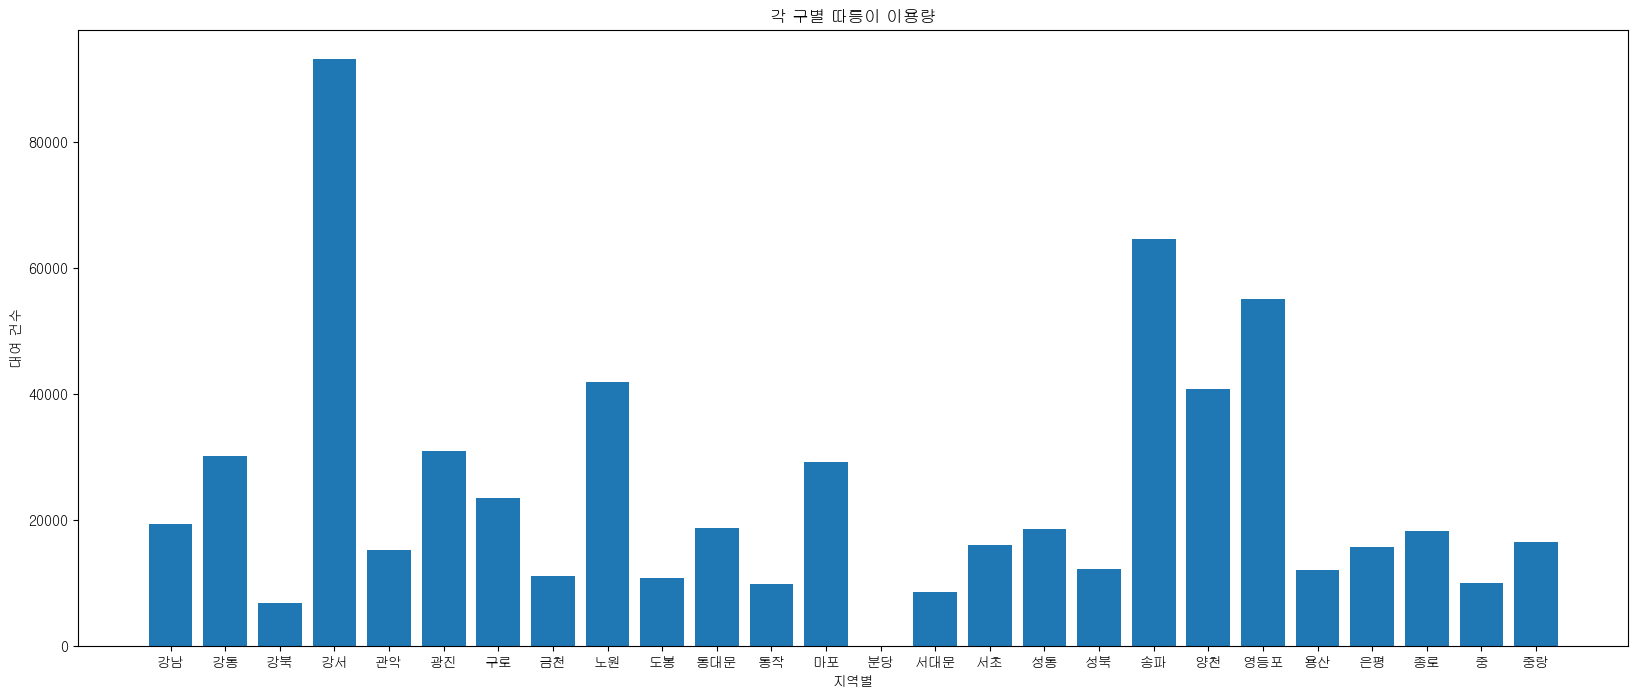

In [38]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

# 맥 OS 폰트 깨짐 방지 코드
# from matplotlib import rc
# rc('font', family='AppleGothic') 			
# plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(출발_구별_이동_수['시작_대여소_구'], 출발_구별_이동_수['이동_수'])

plt.title('각 구별 따릉이 이용량')
plt.xlabel('지역별')
plt.ylabel('대여 건수')

plt.show()

# 결과 중간 해석
- 강서의 따릉이 이용량이 가장 많은 것을 알 수 있다
- 따라서 강서 지역을 분석 지역으로 선정

----

### 강서 데이터 추출

강서 따릉이 대여소 ID 추출

In [43]:
# 서울 전체 따릉이 ID 데이터 불러오기

대여소_data = data[['대여소_ID', '주소1']]
대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')

대여소_data

C:\Users\USER\AppData\Local\Temp\ipykernel_8328\3195799676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


,대여소_ID,주소1
0,ST-999,양천
1,ST-998,양천
2,ST-997,양천
3,ST-996,양천
4,ST-995,양천
...,...,...
3293,ST-1002,양천
3294,ST-1001,양천
3295,ST-1000,양천
3296,ST-100,광진


In [46]:
# 강서구 따릉이 대여소 ID 변수 생성

# 대여소_data의 '주소1'가 '강서'인 경우 '대여소_ID'를 강서_대여소_ID에 할당
강서_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강서', '대여소_ID']

# 데이터 프레임 생성
강서_대여소_ID_df = pd.DataFrame({'대여소_ID': 강서_대여소_ID})

강서_대여소_ID_df

,대여소_ID
26,ST-975
179,ST-837
180,ST-836
181,ST-835
182,ST-834
...,...
3224,ST-1066
3225,ST-1065
3226,ST-1064
3227,ST-1063


In [47]:
# csv 파일 저장
# 강서_대여소_ID_df.to_csv('강서_따릉이_대여소_ID.csv', index=False)

In [48]:
pd.read_csv('../Data/강서_따릉이_대여소_ID.csv')

,대여소_ID
0,ST-975
1,ST-837
2,ST-836
3,ST-835
4,ST-834
...,...
219,ST-1066
220,ST-1065
221,ST-1064
222,ST-1063


# 강서구 따릉이 이용량 데이터 생성
- 2023.04.01~2024.03.31
- 휴일, 공휴일 따로 분리
- 대여소_ID를 key로 하여 전체 이용량 데이터에서 강서 데이터만 추출
- 날짜를 기준으로 랜덤하게 2등분 >> 데이터가 너무 크기 때문에 랜덤하게 샘플링하여 진행

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
강서_데이터 = pd.read_csv('../Data/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1739278,2023-12-06,2350,ST-2036,ST-1718,1,3,523,2,0,0
1739279,2023-12-06,2350,ST-2831,ST-1645,1,5,639,2,0,0
1739280,2023-12-06,2350,ST-1715,ST-2045,1,2,400,2,0,0
1739281,2023-12-06,2355,ST-1062,ST-2789,1,3,540,2,0,0


In [8]:
# 24년도에 신설된 대여소 존재 >> 대여소_ID : 'ST-3284'

# 이용 시간 = 0, 전체 이용 거리 = 0 인 데이터 제거
강서_데이터 = 강서_데이터[(강서_데이터['전체_이용_분'] != 0) & (강서_데이터['전체_이용_거리'] != 0)]

### 시간대별 이용량 확인

In [15]:
# 시간 형식 수정 함수 정의
# 기준_시간대 열의 형식이 '1155' 이런 식이기 때문에 시간 형식으로 변환
def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

# 기준_시간대 열의 형식을 변환한 '한시간_구간' 열 생성
강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum()

시각화

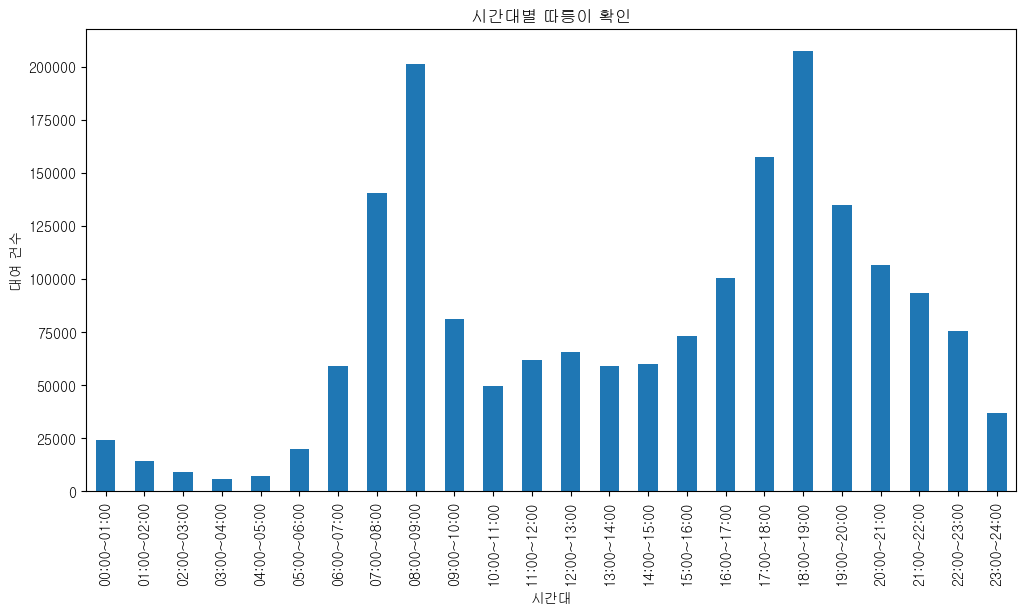

In [21]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

plt.figure(figsize=(12, 6))
강서_시간대별_건수2.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('시간대')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

- 가장 이용량이 급증한 시간대 2곳 발견
- 06~10시 / 17~21시 >> 출근과 퇴근 시간대
- 따릉이의 평일 이용의 가장 큰 비중은 출퇴근 시간임을 추론

출퇴근 시간대 이용량 확인

In [18]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00' # 퇴근시간
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()

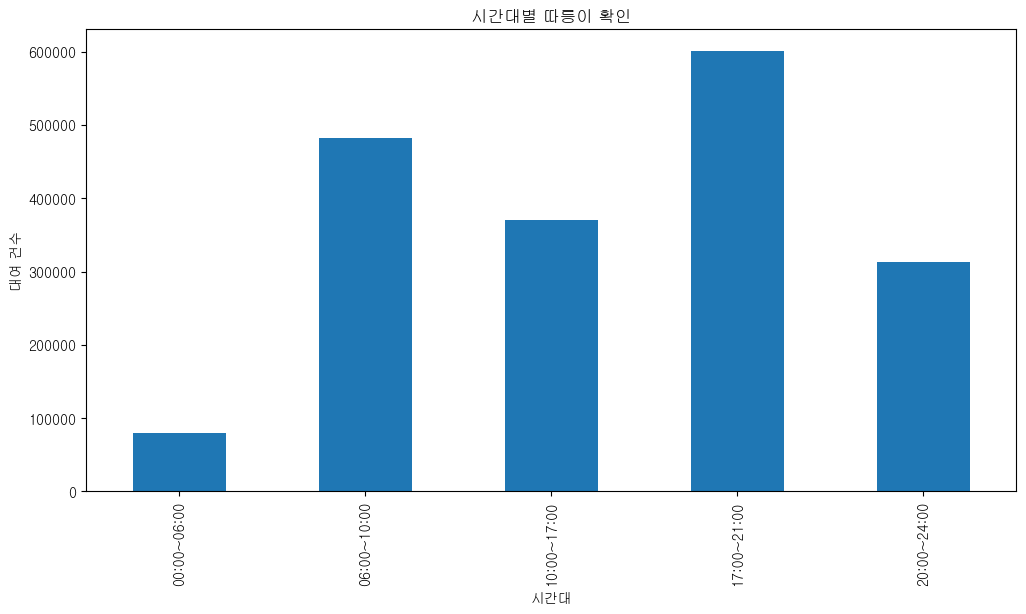

In [20]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('시간대')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

요일별 이용량 확인

In [29]:
강서_데이터[:5]

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일,한시간_구간,시간대_구간
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,월,0,0,02:00~03:00,00:00~06:00
1,2023-05-08,1155,ST-824,ST-824,1,1,80,월,0,0,11:00~12:00,10:00~17:00
2,2023-05-08,1230,ST-829,ST-829,1,1,111,월,0,0,12:00~13:00,10:00~17:00
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,월,0,0,13:00~14:00,10:00~17:00
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,월,0,0,16:00~17:00,17:00~21:00


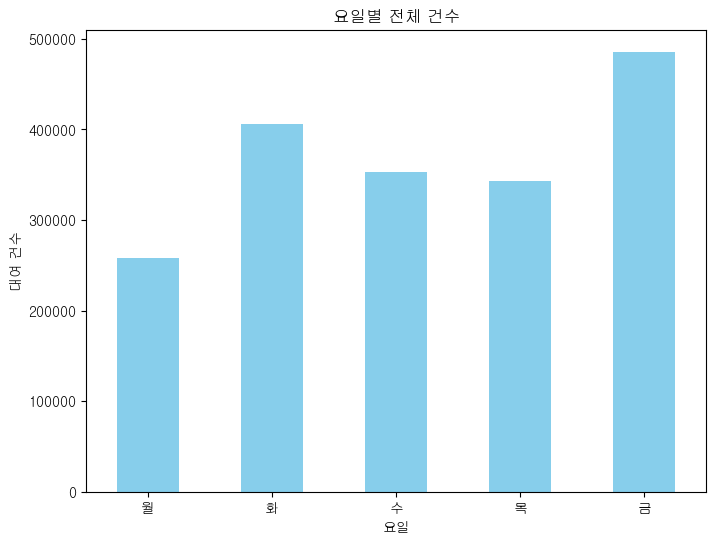

In [30]:
# 기준_날짜 열을 날짜 형식으로 변환
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])

# 기준_날짜 열에서 요일을 추출하여 새로운 열 추가
강서_데이터['요일'] = 강서_데이터['기준_날짜'].dt.day_name()
# 영어 요일명을 한글 요일명으로 변환하는 사전 생성
영어_한글_요일_매핑 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',

}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['요일'] = 강서_데이터['요일'].map(영어_한글_요일_매핑)

# 요일별 전체 건수 통계 계산
요일별_통계 = 강서_데이터.groupby('요일')['전체_건수'].sum()


# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
요일별_통계[요일_순서].plot(kind='bar', color='skyblue')
plt.title('요일별 전체 건수')
plt.xlabel('요일')
plt.ylabel('대여 건수')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.show()

----

# 강서구 대여소 쏠림현상 확인
- 대여량 = 반납량 (평형상태)
- 대여량 > 반납량 (비평형 상태 - 부족)
- 대여량 <> 반납량 (비평형 상태 - 과잉)
- 즉 과잉 대여소의 자전거를 부족 대여소로 옮긴다

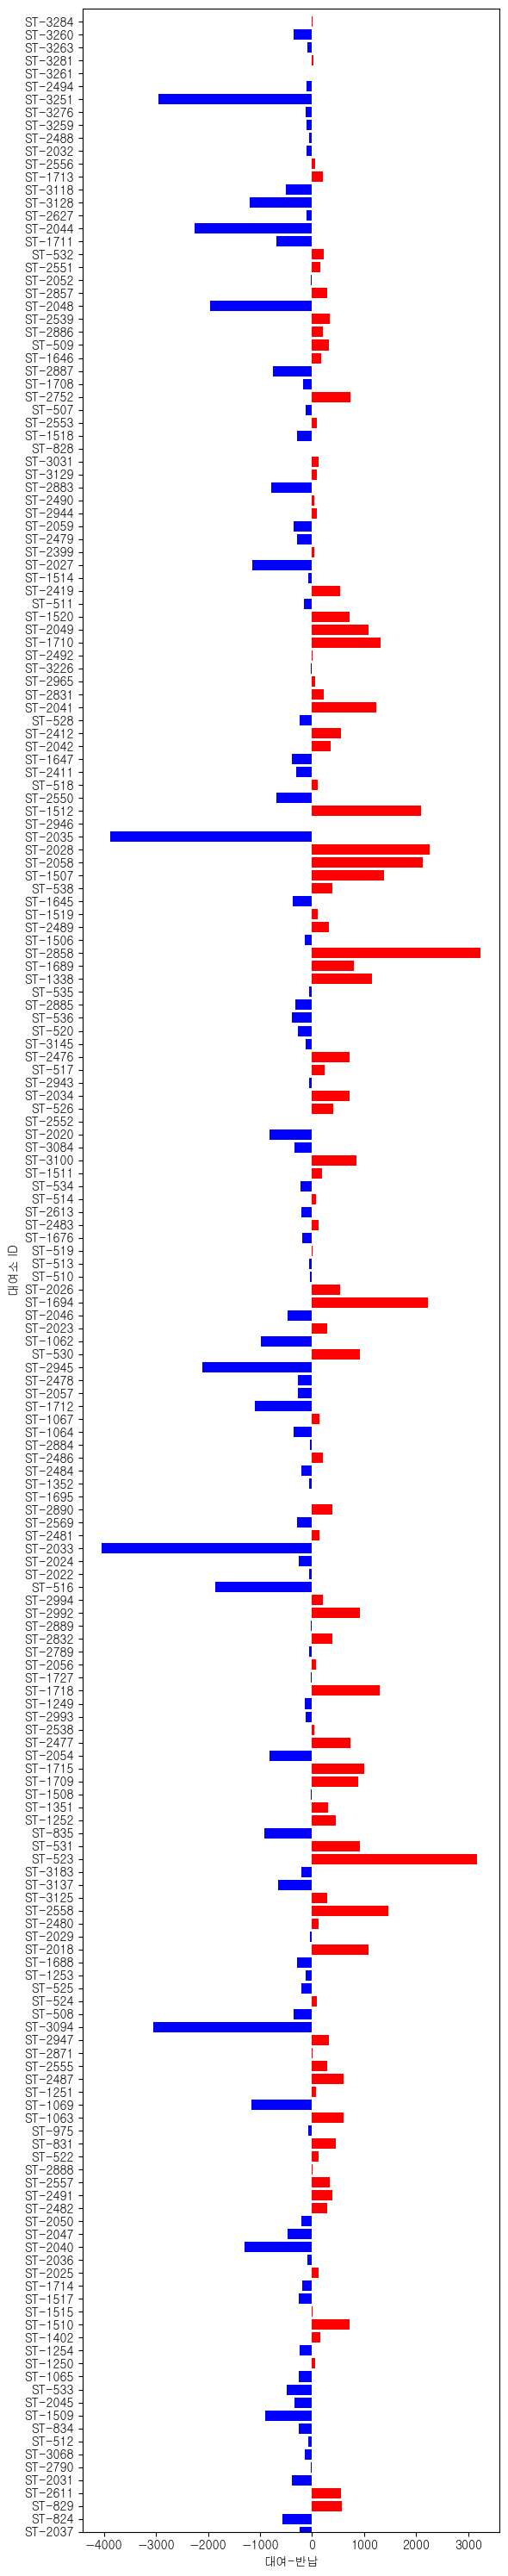

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

# 강서 대여소 ID 정보 불러옴
강서_대여소_ID = pd.read_csv('../Data/강서_따릉이_대여소_ID.csv',encoding='utf-8')

# 강서 대여소 이용 현황 정보 불러옴
강서_데이터 = pd.read_csv('../Data/강서_따릉이_데이터_01.csv',encoding='utf-8')

# 시작 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 대여한 총량)
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 반납한 총량)
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()

# 강서구에 위치한 대여소 ID 리스트업
len(강서_데이터['시작_대여소_ID'].unique())
# 강서구_대여소_ID_list == '강서구에 위치한 대여소 ID 리스트'로 변수 지정
강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()

# 대여소 ID를 인덱스로 가지는 시작횟수 리스트 생성
temp_list = []
for i in range(len(강서_대여소_ID_list)):
    temp_list.append(시작대여소별_전체횟수[강서_대여소_ID_list[i]])

# start_count == 대여소 ID를 인덱스로 가지는 시작횟수 리스트로 시리즈 변수 생성
start_count = temp_list.copy()

# 대여소 ID를 인덱스로 가지는 종료횟수 리스트 생성
temp_list2 = []
for i in range(len(강서_대여소_ID_list)):
    temp_list2.append(종료대여소별_전체횟수[강서_대여소_ID_list[i]])

# end_count == 대여소 ID를 인덱스로 가지는 종료횟수 리스트로 시리즈 변수 생성
end_count = temp_list2.copy()

# 강서_대여소_정보 DataFrame 생성
# column = ['대여소_ID', '대여건수', '반납건수']
강서_대여소_정보 = {'대여소_ID' : 강서_대여소_ID_list, '대여건수' : start_count, '반납건수' : end_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

# '대여-반납' column 생성 >> 쏠림 현상 유무 확인 기준 지표
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']

# '대여-반납'값 : x축 / 대여소_ID : y축 을 가지는 그래프 생성
import matplotlib.font_manager as fm

colors = ['red' if val > 0 else 'blue' for val in 강서_대여소_정보['대여-반납']]
fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'], color = colors)
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 195)

plt.tight_layout()
plt.show()

# 해당 그래프 분석을 통한 쏠림 현상 발생 대여소 선별 예정

### 대여소 별 주거지구/ 상업지구 대여소 라벨링
- 주거지구 : 출근시간대 반납량 > 대여량 / 퇴근시간대 반납량 < 대여량
- 상업지구 : 출근시간대 반납량 < 대여량 / 퇴근시간대 반납량 > 대여량
- 용도구분 지도 참고

----